## GEO371T/GEO398D - Introduction to Machine Learning for Geosciences
### Simple Descriptive and Inferential Statistics 
#### What should you take from this workflow?
* Become familiar with how to implement various statistical measures given well, flower and housing data

__Well data:__
* This is part of the Bakken unconventional reservoir dataset series, but will be left for homework

__Flower data:__
* This dataset is from the sklearn library, and has a series of predictive features that describe several types of iris flowers

__Housing data:__
* This dataset is also from the sklearn library, it is based on the Boston Housing problem, and has a series of predictive features (e.g. Crime, Owner Age, Distance to Employment Centers,...) that can be used to predict the dataset's target feature: Median value of owner-occupied homes in units $1000s

For more info on the flower and housing datasets, please visit: https://scikit-learn.org/stable/datasets

In this workflow, we will show how to describe and generating statistical measures for both the flower and housing datasets. Some of this may be repeat from the Lab02 labs, but there will be some new methods and procedures laid out here in this lab.



# Univariate statistics 

Ref: /pystatsml-master/statistics/

Basics univariate statistics are required to explore dataset:

- Discover associations between a variable of interest and potential predictors. It is strongly recommended to start with simple univariate methods before moving to complex multivariate predictors. 

- Assess the prediction performances of machine learning predictors.

- Most of the univariate statistics are based on the linear model which is one of the main model in machine learning.


## Estimators of the main statistical measures


### Expected Value

Properties of the expected value operator $\operatorname{E}(\cdot)$ of a random variable $X$


\begin{align}
    E(X + c) &= E(X) + c \\ 
    E(X + Y) &= E(X) + E(Y) \\ 
    E(aX)    &= a E(X)
\end{align}

$$
    E(X) = \frac{1}{n} \sum_i p_ix_i
$$

### Mean

The estimator $\bar{x}$ on a sample of size $n$: $x = x_1, ..., x_n$ is given by
$$
    \bar{x} = \frac{1}{n} \sum_i x_i
$$

$\bar{x}$ is itself a random variable with properties:

- $E(\bar{x}) = \bar{x}$,

- $Var(\bar{x}) = \frac{Var(X)}{n}$.

### Variance

$$
    Var(X) = E((X - E(X))^2) =  E(X^2) - (E(X))^2
$$

The estimator is
$$
    \sigma_x^2 = \frac{1}{n-1} \sum_i (x_i - \bar{x})^2
$$

Note here the subtracted 1 degree of freedom (df) in the divisor. In standard statistical practice, $df=1$ provides an unbiased estimator of the variance of a hypothetical infinite population. With $df=0$ it instead provides a maximum likelihood estimate of the variance for normally distributed variables.

### Standard deviation

$$
    Std(X) = \sqrt{Var(X)}
$$

The estimator is simply $\sigma_x = \sqrt{\sigma_x^2}$.

### Covariance

$$
    Cov(X, Y) = E((X - E(X))(Y - E(Y))) =  E(XY) - E(X)E(Y).
$$

Properties: 
$$
    \operatorname{Cov}(X, X) = \operatorname{Var}(X)\\
    \operatorname{Cov}(X, Y) = \operatorname{Cov}(Y, X)\\
    \operatorname{Cov}(cX, Y) = c \operatorname{Cov}(X, Y)\\
    \operatorname{Cov}(X+c, Y) = \operatorname{Cov}(X, Y)\\
$$

The estimator with $df=1$ is
$$
    \sigma_{xy} = \frac{1}{n-1} \sum_i (x_i - \bar{x}) (y_i - \bar{y}).
$$

### Correlation

$$
    Cor(X, Y) = \frac{Cov(X, Y)}{Std(X)Std(Y)}
$$

The estimator is
$$
    \rho_{xy} = \frac{\sigma_{xy}}{\sigma_{x} \sigma_{y}}.
$$

### Standard Error (SE) 

The standard error (SE) is the standard deviation (of the sampling distribution) of a statistic: 
$$
    SE(X) = \frac{Std(X)}{\sqrt{n}}.
$$

It is most commonly considered for the mean with the estimator

\begin{align}
SE(x) &= Std(X) = \sigma_{\bar{x}}\\
      &= \frac{\sigma_x}{\sqrt{n}}.
\end{align}


Before going through this workflow, let's first load in our libraries

### Import all essential libraries

In [1]:
from sklearn.datasets import load_iris          # iris dataset
import numpy as np                              # ndarrys for gridded data
import pandas as pd                             # DataFrames for tabular data
import matplotlib.pyplot as plt                 # For plotting
import seaborn as sns                           # For matrix scatter plots
from scipy import stats                         # Summary statistics and statistical methods
sns.set(font_scale=0.8)

# Boston housing dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
bos_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
bos_target = raw_df.values[1::2, 2]

### Exercise 1

- Generate 2 random samples: $x \sim N(1.78, 0.4)$ and $y \sim N(1.6, 0.4)$, both of size 10.

- Compute $\bar{x}, \sigma_x, \sigma_{xy}$ (`xbar, xvar, xycov`) using numpy functions

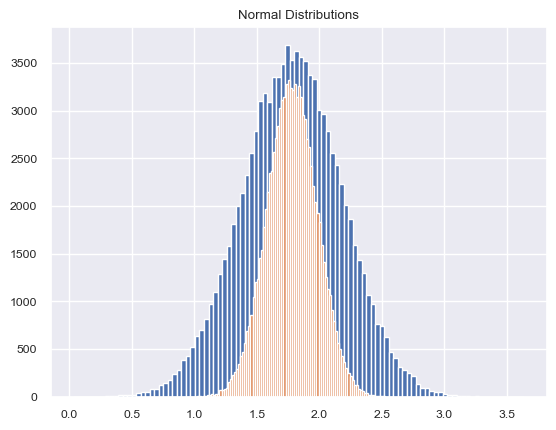

mean y1 =  1.780151980696998
mean y2 =  1.779644835542803
variance y1 =  0.15956278689349937
variance y2 =  0.039642077551921166
covariance y1, y1 =  [[0.15956438 0.00039481]
 [0.00039481 0.03964247]]


In [2]:
#np.random.seed(43)
N=100000  # number of random draws

y1=np.zeros(N)
y2=np.zeros(N)
for i in range(0,N):
    y1[i]=(np.random.normal(1.78,0.4))
    y2[i]=(np.random.normal(1.78,0.2))
plt.hist(y1,100)
plt.hist(y2,100)
plt.title('Normal Distributions')
plt.show()

print('mean y1 = ', np.mean(y1))
print('mean y2 = ', np.mean(y2))
print('variance y1 = ', np.var(y1) )
print('variance y2 = ', np.var(y2) )
print('covariance y1, y1 = ', np.cov(y1,y2))





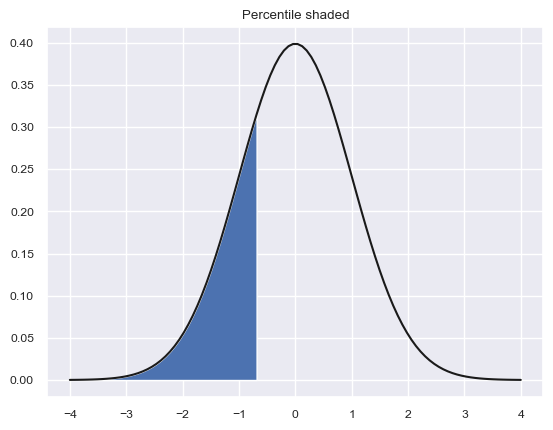

In [3]:
# Drawing a probablity curve
xx=np.linspace(-4,4,100)
p_y1=stats.norm.pdf(xx,0, 1)  # N[0,1]

plt.plot(xx,p_y1,'k')
plt.fill_between(xx, 0, p_y1, interpolate=True,where=(xx<=stats.norm.ppf(0.25)))
plt.title('Percentile shaded')
plt.show()



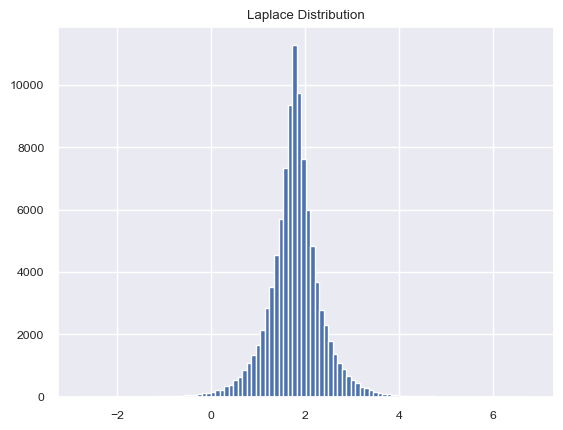

In [4]:
# Generate Exponential Distribition
y_Lap=np.zeros(N)
for i in range(0,N):
    y_Lap[i]=(np.random.laplace(1.78,0.4))

plt.hist(y_Lap,100)
plt.title('Laplace Distribution')
plt.show()

### Boston housing dataset

Let's first start with the Boston housing dataset, let's split it into x and y components, and check the shape of each

In [5]:
X, y = bos_data, bos_target

print('X Data Shape, with shape:', X.shape)
print('y Data Shape, with shape:', y.shape)

X Data Shape, with shape: (506, 13)
y Data Shape, with shape: (506,)


So there are 13 different kinds of predictive features within the X dataset now, and we have our target feature y, that resembles the Median value of owner-occupied homes in $1000s. With that done, let's plot each feature as a function of data points

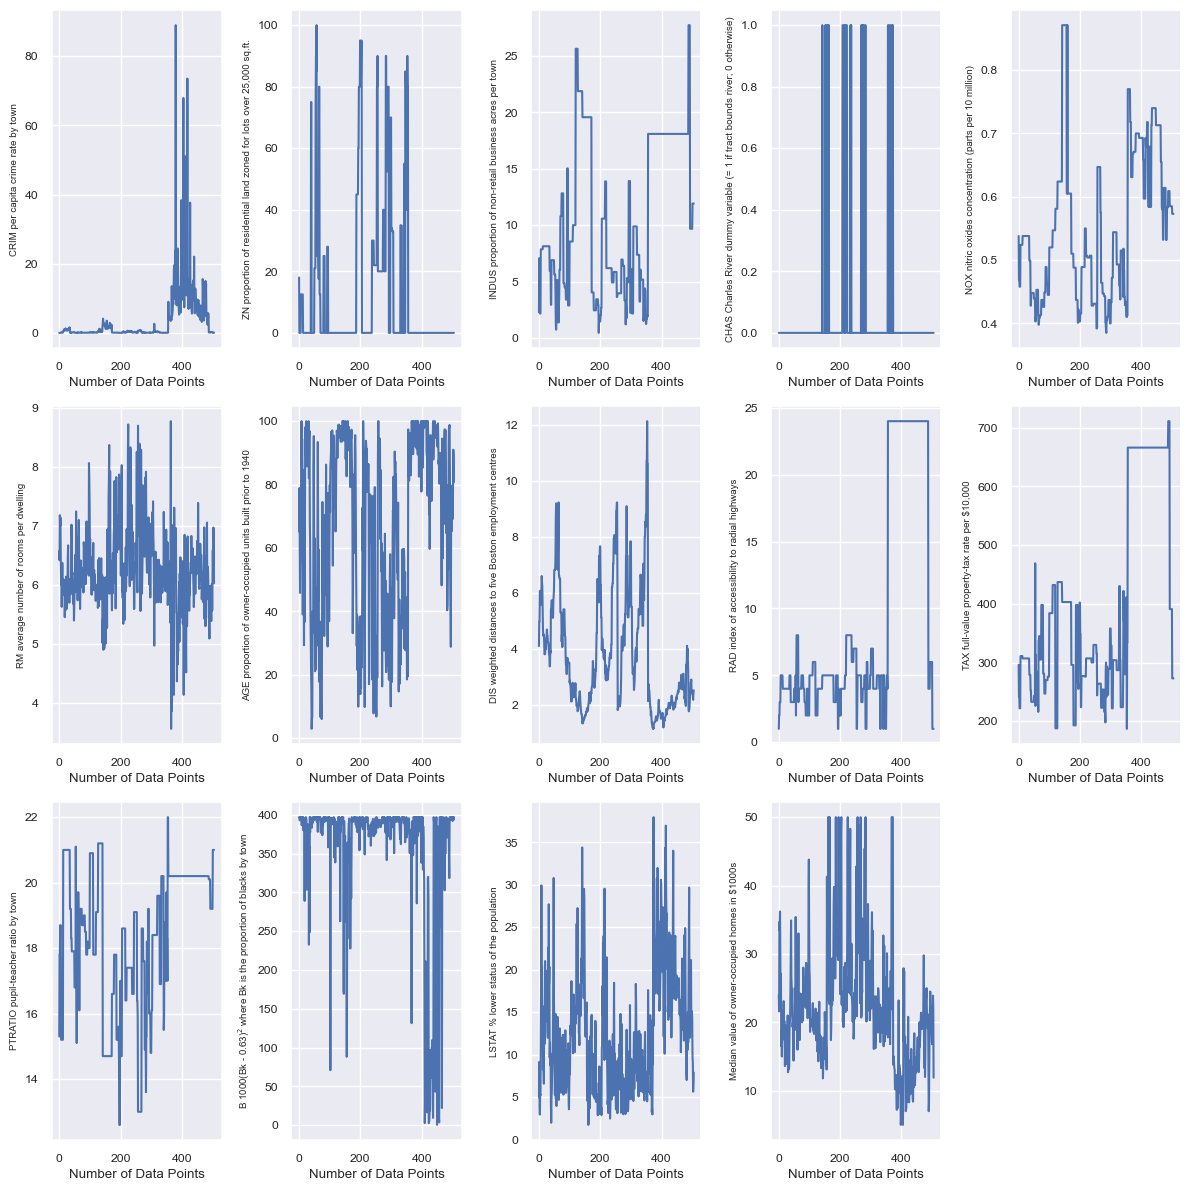

In [6]:
plt.figure(figsize=(12, 12))
size = 7

plt.subplot(3, 5, 1)
plt.plot(X[:, 0])
plt.ylabel('CRIM per capita crime rate by town', size=size)
plt.xlabel('Number of Data Points')

plt.subplot(3, 5, 2)
plt.plot(X[:, 1])
plt.ylabel('ZN proportion of residential land zoned for lots over 25,000 sq.ft.', size=size)
plt.xlabel('Number of Data Points')

plt.subplot(3, 5, 3)
plt.plot(X[:, 2])
plt.ylabel('INDUS proportion of non-retail business acres per town', size=size)
plt.xlabel('Number of Data Points')

plt.subplot(3, 5, 4)
plt.plot(X[:, 3])
plt.ylabel('CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)', size=size)
plt.xlabel('Number of Data Points')

plt.subplot(3, 5, 5)
plt.plot(X[:, 4])
plt.ylabel('NOX nitric oxides concentration (parts per 10 million)', size=size)
plt.xlabel('Number of Data Points')

plt.subplot(3, 5, 6)
plt.plot(X[:, 5])
plt.ylabel('RM average number of rooms per dwelling', size=size)
plt.xlabel('Number of Data Points')

plt.subplot(3, 5, 7)
plt.plot(X[:, 6])
plt.ylabel('AGE proportion of owner-occupied units built prior to 1940', size=size)
plt.xlabel('Number of Data Points')

plt.subplot(3, 5, 8)
plt.plot(X[:, 7])
plt.ylabel('DIS weighted distances to five Boston employment centres', size=size)
plt.xlabel('Number of Data Points')

plt.subplot(3, 5, 9)
plt.plot(X[:, 8])
plt.ylabel('RAD index of accessibility to radial highways', size=size)
plt.xlabel('Number of Data Points')

plt.subplot(3, 5, 10)
plt.plot(X[:, 9])
plt.ylabel('TAX full-value property-tax rate per $10,000', size=size)
plt.xlabel('Number of Data Points')

plt.subplot(3, 5, 11)
plt.plot(X[:, 10])
plt.ylabel('PTRATIO pupil-teacher ratio by town', size=size)
plt.xlabel('Number of Data Points')

plt.subplot(3, 5, 12)
plt.plot(X[:, 11])
plt.ylabel('B 1000(Bk - 0.63)$^2$ where Bk is the proportion of blacks by town', size=size)
plt.xlabel('Number of Data Points')

plt.subplot(3, 5, 13)
plt.plot(X[:, 12])
plt.ylabel('LSTAT % lower status of the population', size=size)
plt.xlabel('Number of Data Points')

plt.subplot(3, 5, 14)
plt.plot(y)
plt.ylabel('Median value of owner-occupied homes in $1000s', size=size)
plt.xlabel('Number of Data Points')

plt.tight_layout()
plt.show()

So now we have a sense in the type of features we are dealing with, and their shape as we move down the rows of the dataset. Let's use numpy array to compute a feature's std and plot the +/- std alongside the original feature values just for the first feature in order to keep this workflow organized

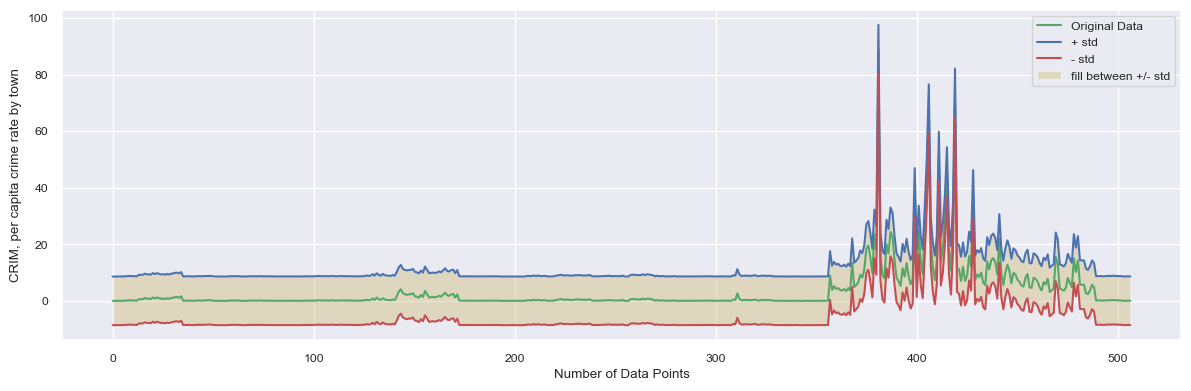

In [7]:
plt.figure(figsize=(12, 4))
x_length = np.linspace(0, len(X[:, 0]), num=len(X[:, 0]))

feature1_std = X[:, 0].std(axis=0)
feature1_std_plus = X[:, 0] + feature1_std
feature1_std_minus = X[:, 0] - feature1_std
plt.plot(x_length, X[:, 0], 'g-', label='Original Data')
plt.plot(x_length, feature1_std_plus, 'b-', label='+ std')
plt.plot(x_length, feature1_std_minus, 'r-', label='- std')
plt.fill_between(x_length, feature1_std_minus, feature1_std_plus, facecolor='y', alpha=0.4, label='fill between +/- std')
plt.ylabel('CRIM, per capita crime rate by town')
plt.xlabel('Number of Data Points')
plt.legend()

plt.tight_layout()
plt.show()

So if we weren't sure or confident in how our data was collected, we could do something like this. Note that this type of plot would give you the most information if you had several columns of slightly varying data of the same feature (say you had production rates sampled each day over a week across a given well), but for the purpose of this lab, this is sufficient. Now let's generate the mean, P10, and P90 for this given feature. Let's also calculate the STD again to see what the actual value was that we just plotted.

In [8]:
# Mean
feature1_mean = X[:, 0].mean(axis=0)  # axis 0 corresponds to calculating std dev over all rows
print('AVG:', feature1_mean)
# STD
feature1_std = X[:, 0].std(axis=0)
print('STD:', feature1_std)
# P10 i.e. 10% of the data are below P10
feature1_p10 = np.percentile(X[:, 0], 10, axis=0)
print('P10:', feature1_p10)
# P90
feature1_p90 = np.percentile(X[:, 0], 90, axis=0)
print('P90:', feature1_p90)

AVG: 3.613523557312254
STD: 8.59304135129577
P10: 0.038195
P90: 10.753


Let's now use the SciPy to perform more statistical measures. We will calculate the Student's t-test, where scipy.stats.ttest_1samp() tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distribution of given population mean). It returns the T statistic, and the p-value (see the function’s help) (from https://scipy-lectures.org/packages/statistics/index.html)

In [9]:
stats.ttest_1samp(X[:, 0], 0)

TtestResult(statistic=9.4499536344042, pvalue=1.2625925488128975e-19, df=505)

Now let's create a DataFrame with just the first 5 features in order to generate some statistics using the pandas library, and let's include in the target, y, feature

In [10]:
df1 = pd.DataFrame(X[:, :5], columns=['feature1', 'feature2', 'feature3', 'feature4', 'feature5'])
df2 = pd.DataFrame(y, columns=['feature_target'])
df = pd.concat([df1, df2], axis=1)
print(df.shape)
df.head() # to view the first 5 rows of the DataFrame

(506, 6)


,feature1,feature2,feature3,feature4,feature5,feature_target
0,0.00632,18.0,2.31,0.0,0.538,24.0
1,0.02731,0.0,7.07,0.0,0.469,21.6
2,0.02729,0.0,7.07,0.0,0.469,34.7
3,0.03237,0.0,2.18,0.0,0.458,33.4
4,0.06905,0.0,2.18,0.0,0.458,36.2


Now let's use the .describe() to get some statistics

In [11]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature_target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,50.000000


Great, we have found the mean, std, min, max, and several percentiles for each of the features. Let's now calculate the Pearson and rank correlation coefficient. The Pearson correlation coefficient tells you how well feature xi compares to feature xj (i.e., the quality of fit). The rank correlation coefficient tell you the same think, but with the removal of outliers.

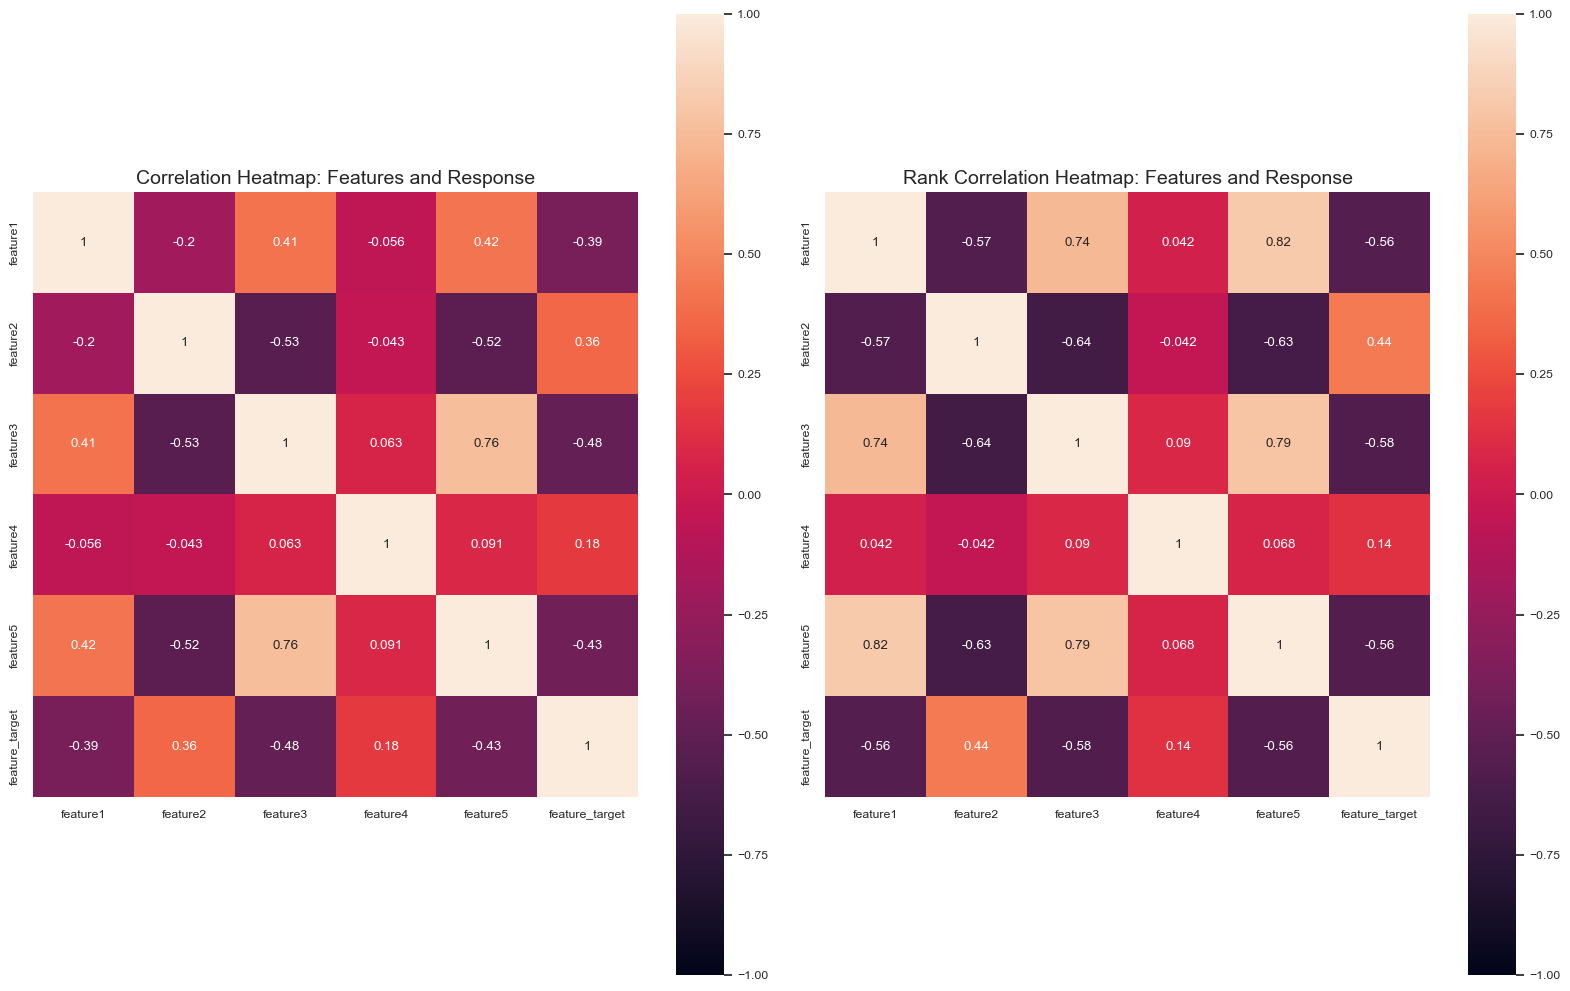

In [12]:
correlation = df.corr()
rank_correlation, rank_correlation_pval = stats.spearmanr(df)
rank_correlation = rank_correlation[:, -1][:-1]
rank_correlation_pval = rank_correlation_pval[:, -1][:-1]
rank_correlation_scatter, rank_correlation_pval = stats.spearmanr(df)

plt.figure(figsize=(16, 10))

plt.subplot(1, 2, 1)
sns.heatmap(correlation, annot=True, linewidth=0, vmin=-1, square=True)
plt.title("Correlation Heatmap: Features and Response", size=14)

plt.subplot(1, 2, 2)
xticks = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature_target']
yticks = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature_target']
sns.heatmap(rank_correlation_scatter, annot=True, linewidth=0, vmin=-1, square=True, xticklabels=xticks, yticklabels=yticks)
plt.title("Rank Correlation Heatmap: Features and Response", size=14)

plt.tight_layout()

### Iris flower dataset

Now let's move onto the flower dataset, and let's set up the problem similar to the previous dataset. Note that are target data here isn't a series of continuous values rather it is categorical. What that means is that we have alternating values of 0, 1, and 2 here corresponding to a Iris-Setosa flower (value 0), a Iris-Versicolor flower (value 1), and a Iris-Virginica flower (value 2). The four predictive features can be used to help a machine learning model learn and be able to describe an area that differentiates between the various flowers (more on that later in the class). For now, let's load in the data and plot the predictive feature.

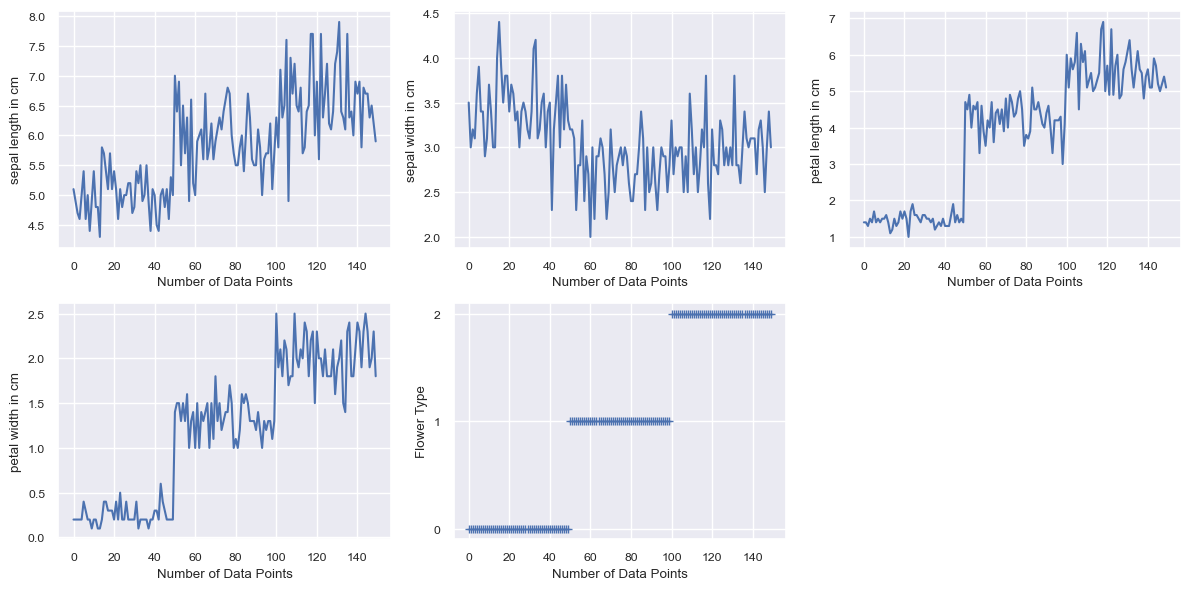

In [13]:
iris = load_iris(return_X_y=False)
X = iris.data[:, :]     # Using only the feature found in columns 1 & 2 (i.e., sepal length in cm & sepal width in cm)
y = iris.target         # This is an array with values of 0, 1, and 2 corresponding to the type of iris flower

plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.plot(X[:, 0])
plt.xlabel('Number of Data Points')
plt.ylabel('sepal length in cm')

plt.subplot(2, 3, 2)
plt.plot(X[:, 1])
plt.xlabel('Number of Data Points')
plt.ylabel('sepal width in cm')

plt.subplot(2, 3, 3)
plt.plot(X[:, 2])
plt.xlabel('Number of Data Points')
plt.ylabel('petal length in cm')

plt.subplot(2, 3, 4)
plt.plot(X[:, 3])
plt.xlabel('Number of Data Points')
plt.ylabel('petal width in cm')

plt.subplot(2, 3, 5)
plt.plot(y, 'b+')
plt.xlabel('Number of Data Points')
plt.ylabel('Flower Type')
plt.yticks([0, 1, 2])

plt.tight_layout()
plt.show()

Let's generate some boxplots of the four predictive features. But let's first put all of this into a pandas DataFrame, and get our statistical DataFrame to output

In [14]:
df1 = pd.DataFrame(X[:, :], columns=['Sepal_Length_cm', 'Sepal_Width_cm', 'Petal_Length_cm', 'Petal_Width_cm'])
df2 = pd.DataFrame(y, columns=['Flower_Type'])
df = pd.concat([df1, df2], axis=1)
print(df.shape)
df.describe() # to view statistics

(150, 5)


,Sepal_Length_cm,Sepal_Width_cm,Petal_Length_cm,Petal_Width_cm,Flower_Type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Axes: >

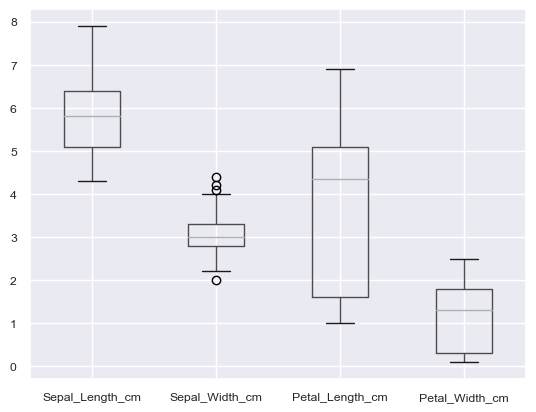

In [15]:
df.boxplot(column=['Sepal_Length_cm', 'Sepal_Width_cm', 'Petal_Length_cm', 'Petal_Width_cm'])

Looks like we have a couple of outliers within the Sepal_Width_cm feature (i.e., the circles outside the extended bars). Let's find out a couple of other ways to generate some statistics here, where we will the mean value of Sepal_Length_cm for the 0 value flower type using pandas

In [16]:
Sepal_Length_cm_mean_0_flower_type = df[df['Flower_Type'] == 0]['Sepal_Length_cm'].mean()
print(Sepal_Length_cm_mean_0_flower_type)

5.006


We can do the same thing with the STD

In [17]:
Sepal_Length_cm_std_0_flower_type = df[df['Flower_Type'] == 0]['Sepal_Length_cm'].std()
print(Sepal_Length_cm_std_0_flower_type)

0.35248968721345136


And for the P10 and P90

In [18]:
Sepal_Length_cm_p10_0_flower_type = np.percentile(df[df['Flower_Type'] == 0]['Sepal_Length_cm'], 10, axis=0)
Sepal_Length_cm_p90_0_flower_type = np.percentile(df[df['Flower_Type'] == 0]['Sepal_Length_cm'], 90, axis=0)
print('P10: ', Sepal_Length_cm_p10_0_flower_type)
print('P90: ', Sepal_Length_cm_p90_0_flower_type)

P10:  4.59
P90:  5.41


Now let's create a scatter plot across all features with univariate distributions between a feature and itself using pandas

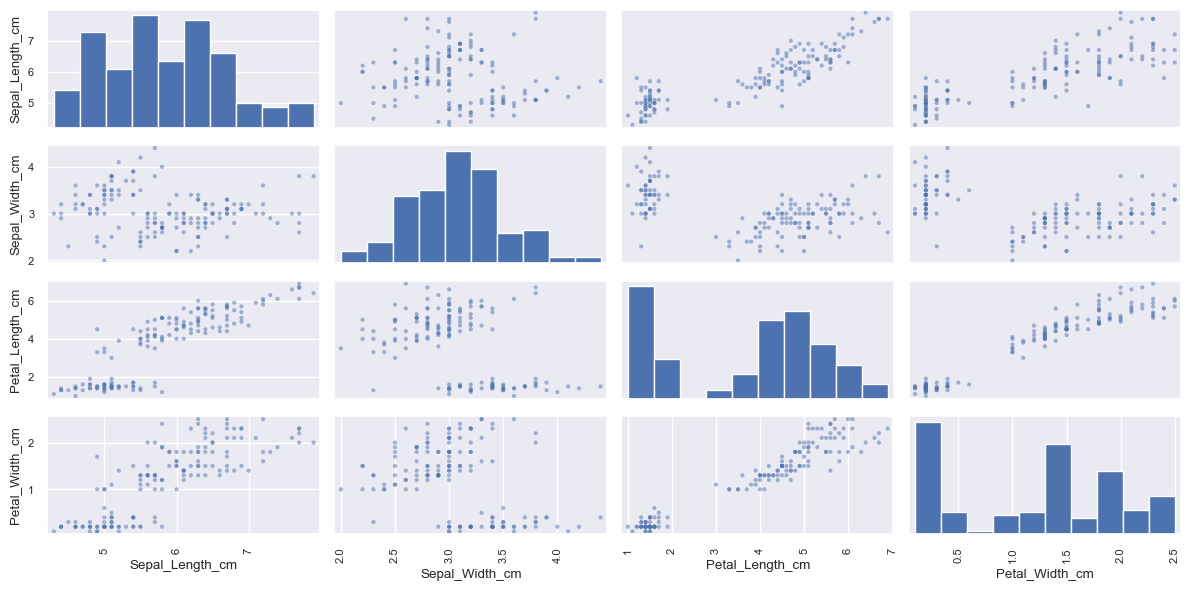

<Figure size 640x480 with 0 Axes>

In [19]:
pd.plotting.scatter_matrix(df[['Sepal_Length_cm', 'Sepal_Width_cm', 'Petal_Length_cm', 'Petal_Width_cm']], figsize=(12,6))
plt.tight_layout()
plt.show()
plt.clf()

We can see that there is a high correlation between Petal_Width_cm and Petal_Length_cm, and that the Sepal_Width_cm distribtion looks Gaussian-like

## Homework
### For this assignment, you will be working with real production data from the Bakken resevoir. Complete the following tasks



1. Load the production data from Structured_Bakken_Production_Data.csv using pandas.read_csv()
2. Remove Nans
3. The first 8 columns are features and the 9th column is the target, cumulative oil production. Compute the mean, variance, 25th peercentile, 50th percentile, and 75th percentile of the features (hint: you can do this with one command).
4. Compute the covariance matrix of the features
5. Create a box plot across all of the features
6. Create a scatter plot across all features with univariate distributions between a feature and itself using pandas




In [20]:
import pandas as pd
import numpy as np

SBP = pd.read_csv("Structured_Bakken_Production_Data.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
SBP.dropna(inplace=True)



SBP.describe()




,Total Depth,Central Tank Battery,fluid_gal,fluid_gal_per_ft,propp_lbs,propp_lbs_per_ft,max_treat_press,max_treat_rate,cum_oil_365
count,4957.000000,4957.000000,4.957000e+03,4957.000000,4.957000e+03,4957.000000,4957.000000,4957.000000,4957.000000
mean,19764.126488,157711.536413,2.312414e+06,785.371269,2.934890e+06,1061.021386,8164.973774,63.826425,92898.153319
std,1834.384404,50020.511619,1.817773e+06,7347.258390,4.727296e+06,10193.233222,2262.919382,432.829947,49395.037814
min,1860.000000,116327.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,8.000000,0.300000,3821.000000
25%,19282.000000,120652.000000,1.406790e+06,175.000000,1.943500e+06,236.000000,7623.000000,31.500000,60154.000000
50%,20300.000000,123428.000000,2.086854e+06,236.000000,2.666843e+06,303.000000,8340.000000,37.400000,84838.000000
75%,20840.000000,219738.000000,2.778090e+06,312.000000,3.409197e+06,389.000000,8882.000000,42.000000,115070.000000
max,26908.000000,416647.000000,6.362664e+07,221142.000000,2.878837e+08,304021.000000,101956.000000,9403.000000,501641.000000


In [21]:
sbp_cov = np.cov(SBP)
print(sbp_cov)


[[1.28858900e+12 1.47405703e+12 1.56118494e+12 ... 1.37537164e+12
  1.62955049e+12 8.15209350e+12]
 [1.47405703e+12 1.79519703e+12 1.84642073e+12 ... 1.67601751e+12
  1.89565371e+12 1.12589694e+13]
 [1.56118494e+12 1.84642073e+12 1.92552117e+12 ... 1.72322735e+12
  1.99227451e+12 1.09507227e+13]
 ...
 [1.37537164e+12 1.67601751e+12 1.72322735e+12 ... 1.56598360e+12
  1.76886684e+12 1.05194769e+13]
 [1.62955049e+12 1.89565371e+12 1.99227451e+12 ... 1.76886684e+12
  2.07035905e+12 1.08692676e+13]
 [8.15209350e+12 1.12589694e+13 1.09507227e+13 ... 1.05194769e+13
  1.08692676e+13 8.58899720e+13]]


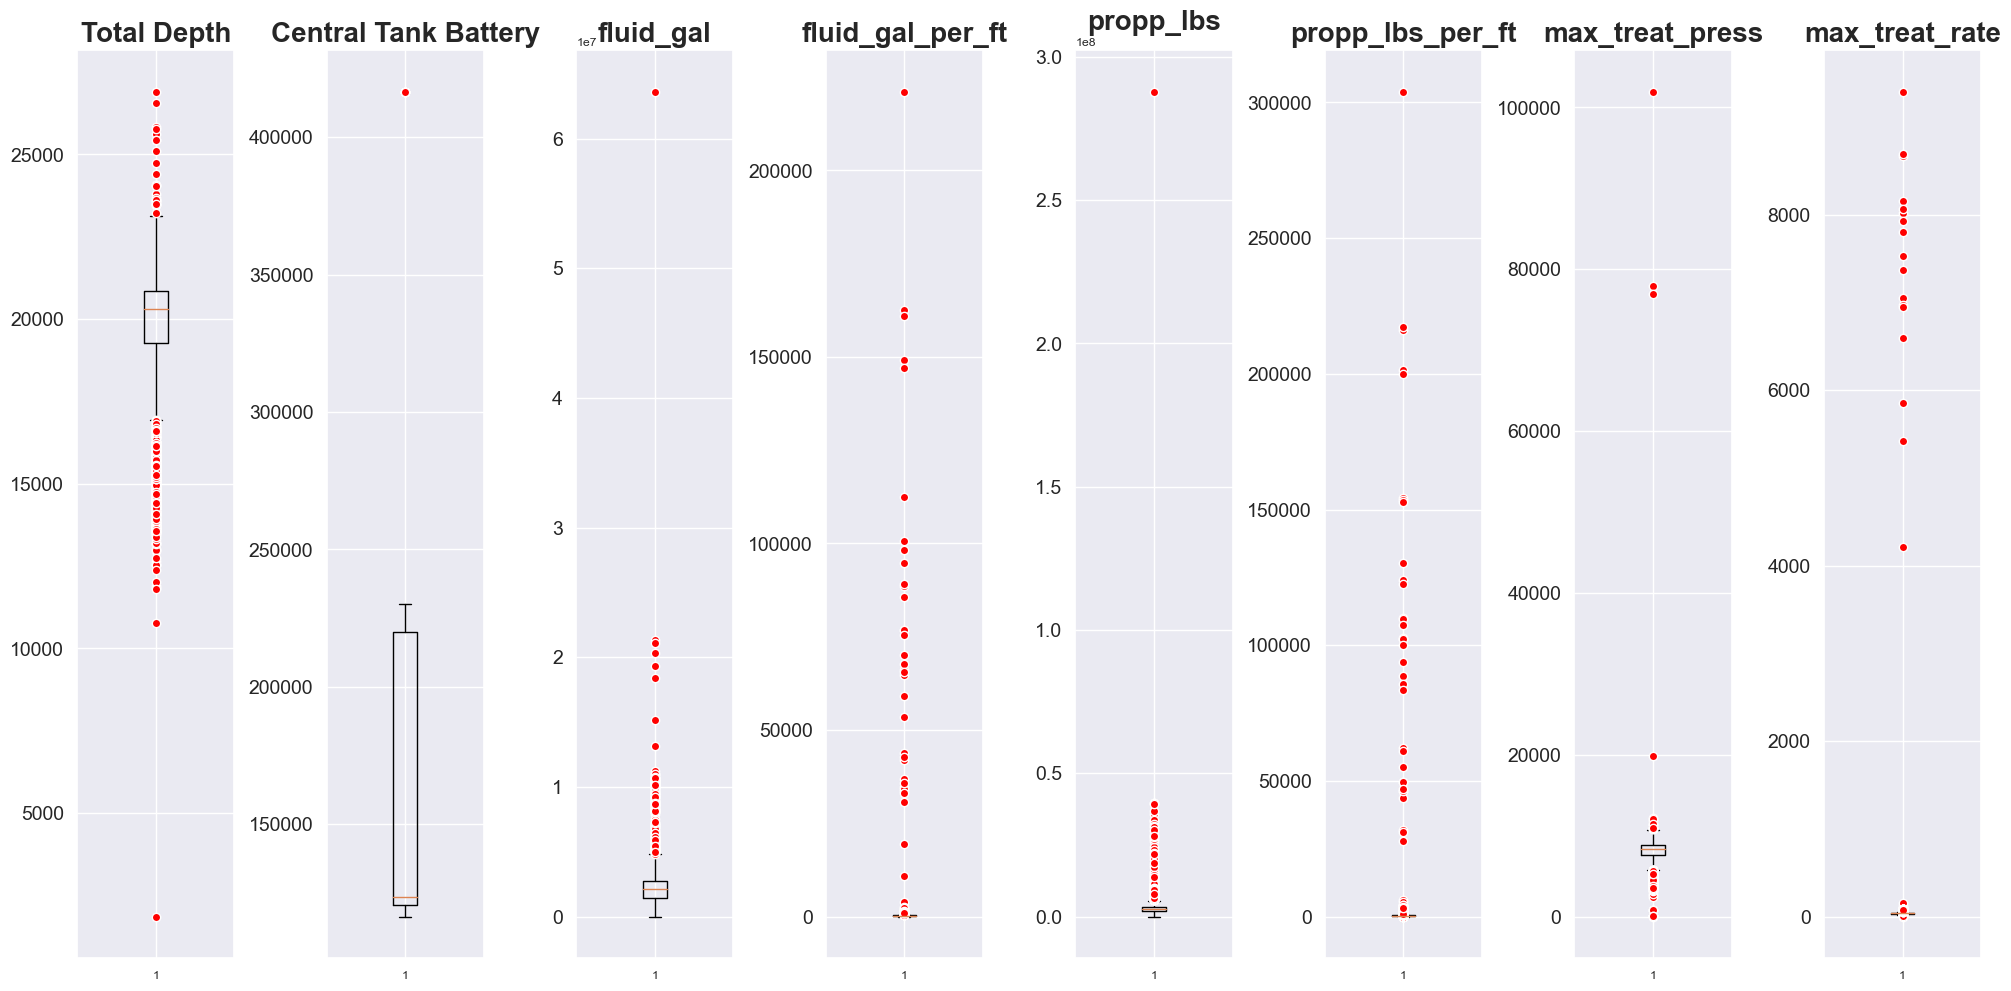

In [22]:
red_circle = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white')

fig,axs = plt.subplots(1,8,figsize = (20,10))

for i , ax in enumerate(axs.flat):
    ax.boxplot(SBP.iloc[:,i],flierprops= red_circle)
    ax.set_title(SBP.columns[i],fontsize= 20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)


plt.tight_layout()

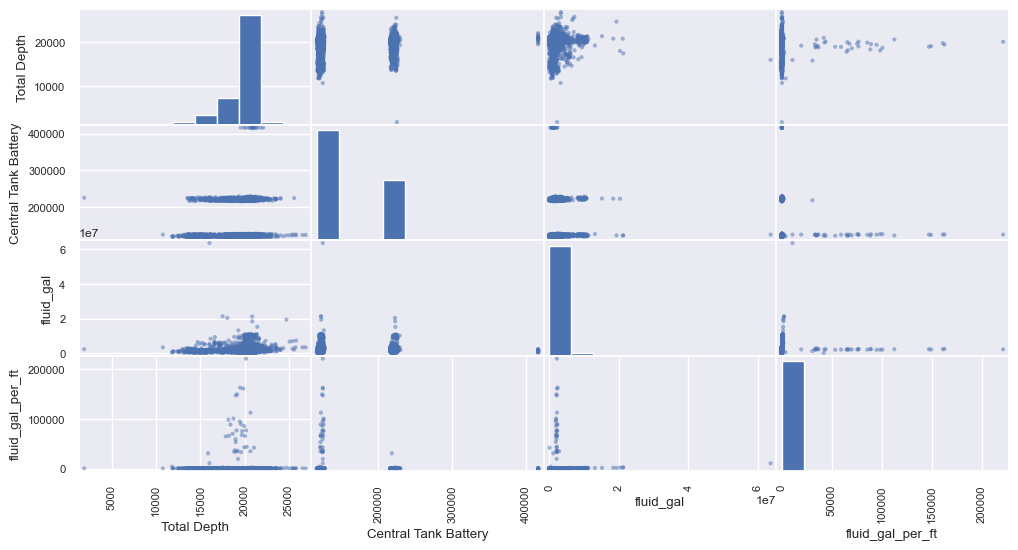

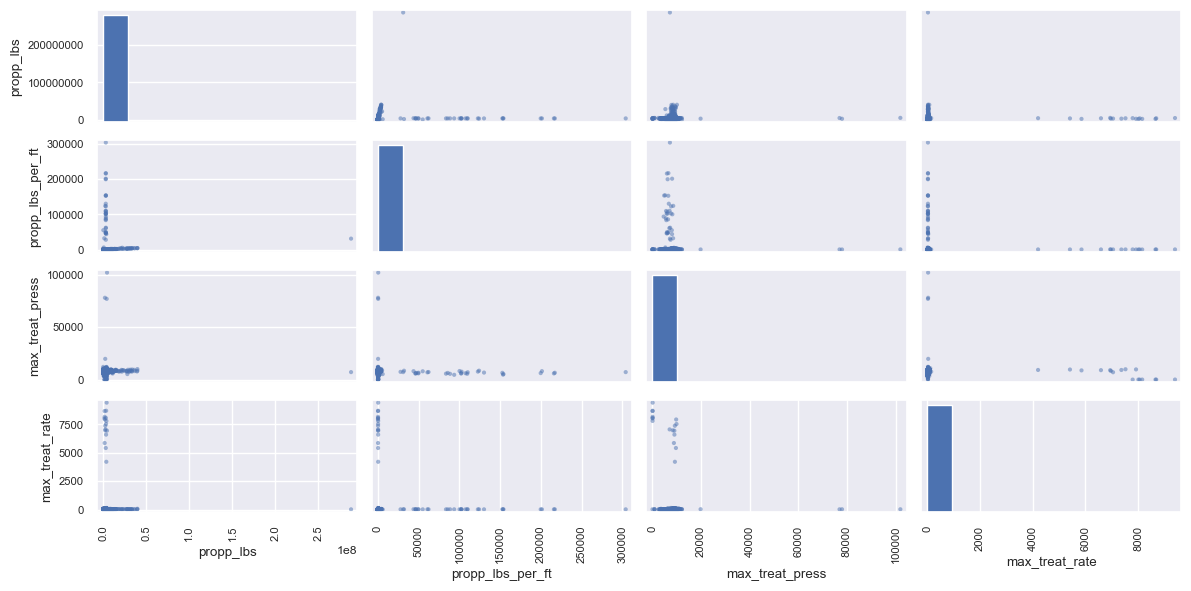

<Figure size 640x480 with 0 Axes>

In [23]:
pd.plotting.scatter_matrix(SBP[['Total Depth','Central Tank Battery','fluid_gal','fluid_gal_per_ft']], figsize=(12,6))
pd.plotting.scatter_matrix(SBP[['propp_lbs','propp_lbs_per_ft','max_treat_press','max_treat_rate']],figsize = (12,6))
plt.tight_layout()
plt.show()
plt.clf()